# Report It! Newport Data Analysis
This notebook runs through some basic analysis of [Report It! Newport](https://engagenewport.com/report-a-problem) data, which uses the  [SeeClickFix](http://www.seeclickfix.com) app.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Clone the seeclickfix archive from [here](https://github.com/NewportDataPortal/seeclickfix-archive)

In [2]:
datafile = '../../Datasets/seeclickfix-archive/newport_2_issues_archive.json'
issues = pd.read_json(datafile, orient="records")

## Types of Issues

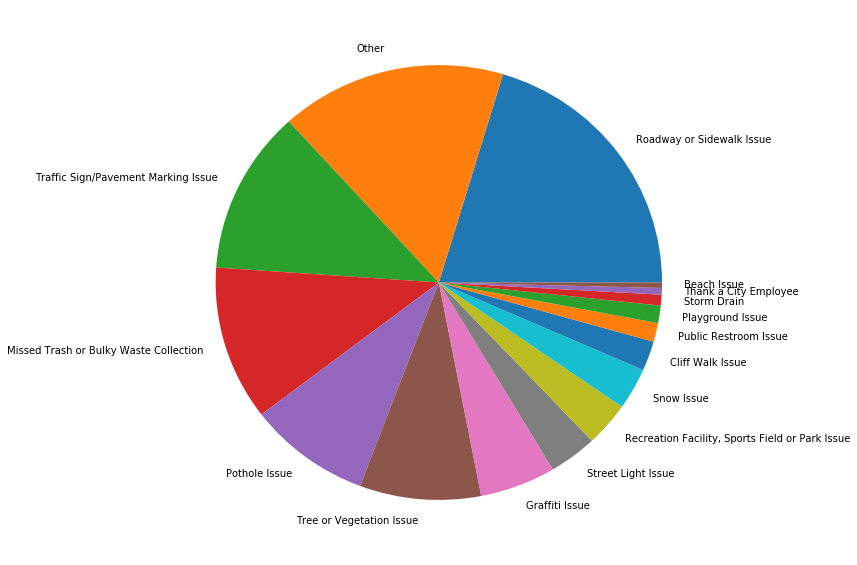

In [3]:
# pie chart of issue types
pie_data = issues['request_type.title'].value_counts()
total = pie_data.sum()
labels = list(pie_data.index)
fig1, ax1 = plt.subplots(figsize=[10,10])
ax1.pie(pie_data.values,labels=labels)
plt.show()

In [4]:
# the raw counts
pie_data

Roadway or Sidewalk Issue                          204
Other                                              164
Traffic Sign/Pavement Marking Issue                122
Missed Trash or Bulky Waste Collection             115
Pothole Issue                                       89
Tree or Vegetation Issue                            88
Graffiti Issue                                      55
Street Light Issue                                  35
Recreation Facility, Sports Field or Park Issue     33
Snow Issue                                          31
Cliff Walk Issue                                    22
Public Restroom Issue                               14
Playground Issue                                    13
Storm Drain                                          8
Thank a City Employee                                5
Beach Issue                                          4
Name: request_type.title, dtype: int64

## Issue Locations

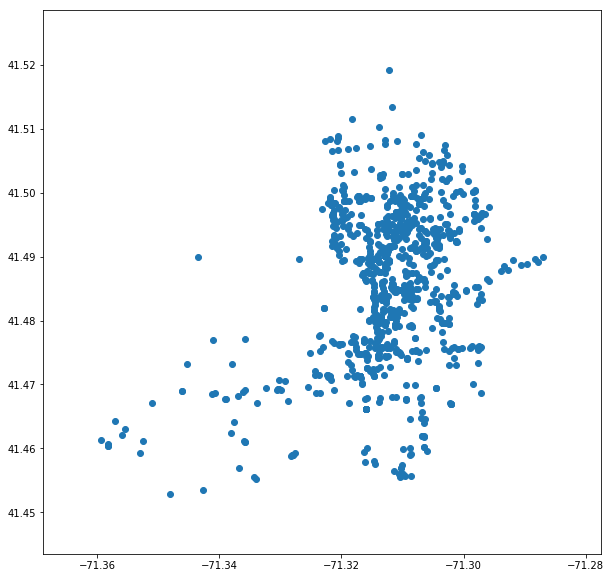

In [5]:
fig2, ax2 = plt.subplots(figsize=[10,10])
ax2.scatter(list(issues['lng']),list(issues['lat']))
plt.show()

## Who's reporting?
Here's how many unique reporting ids there are:

In [6]:
print(len(issues['reporter.id'].unique()))

202


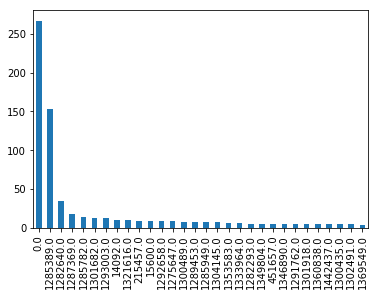

In [7]:
# plot the 30 most frequent reporters
issues['reporter.id'].value_counts().head(30).plot.bar()
plt.show()

It looks like the most frequent reporter is...

In [8]:
issues[issues['reporter.id']==0]['reporter.name'].iloc[0]

'An anonymous SeeClickFix user'

## Responses
What are the statisics for closing issues?

In [9]:
topen = issues.closed_at - issues.created_at
print(topen.max())
print(topen.mean())
print(topen.median())

2230 days 11:49:39
79 days 16:54:44.202020
4 days 00:41:21


In [10]:
now = pd.datetime.now()
still_open = issues[issues['closed_at'].isnull()]
hanging = now - still_open.created_at
print(hanging.mean())
print(hanging.median())

219 days 08:30:59.408226
105 days 20:49:11.074893
